In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os
import json

307
0.4796875


100%|██████████| 10/10 [00:01<00:00,  6.97it/s]


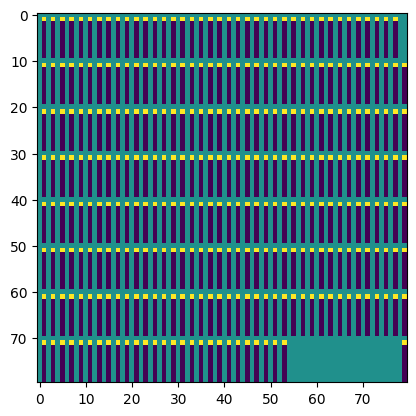

In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

class Simulation:
    def __init__(self,  b_size=100, density=0.5, chain_len=5):
        self.b_size = b_size
        self.board = np.zeros((b_size, b_size))
        self.chain_len = chain_len
        self.density = density
        self.n_chains = int(b_size**2 * density / chain_len)
        self.positions = []
        self.mobility = []      

        idx = 0
        row = 0
        while idx < self.n_chains:
            for i in range(1,self.b_size, 2):
                if self.b_size - i <= 2:
                    row += 1
                chains_positions = [[1+row*chain_len + k , i] for k in range(chain_len-1)]
                self.positions.append(chains_positions)
                idx += 1
                if idx >= self.n_chains:
                    break

        self.labeled_chains = {key: position for key, position in enumerate(self.positions, 1)}
        self.update_board()   
        self.density = len(self.positions) * chain_len / self.b_size**2

    def update_board(self):
        self.board = np.zeros((self.b_size, self.b_size))
        for key, positions in self.labeled_chains.items():
            for index, (x, y) in enumerate(positions):
                if index == 0:
                    # Initialize to a different value if it's the first one in the chain
                    self.board[x, y] = 1
                else:
                    self.board[x, y] = -1

    def free_spot_finder(self, coordinate):
        free_spots = []
        x, y = coordinate
        for s in [1, -1]:
            if self.board[(x + s) % self.b_size, y] == 0:
                free_spots.append([(x + s) % self.b_size, y])
            if self.board[x, (y + s) % self.b_size] == 0:
                free_spots.append([x, (y + s) % self.b_size])
        return free_spots

    def mobility_measurer(self):
        count = 0
        for positions in self.labeled_chains.values():
            x,y = positions[0]
            if len(self.free_spot_finder([x,y])) > 0:
                count += 1
        return count

    def step(self):
      for key, positions in self.labeled_chains.items():
        free_spots = self.free_spot_finder(positions[0])
        if free_spots:
          mov = random.choice(free_spots)
          self.board[positions[-1]] = 0
          positions[1:] = positions[0:-1]
          positions[0] = mov
        self.update_board()
      self.mobility.append(self.mobility_measurer())
    
    def evolution(self, num_of_iterations, show_progress_bar=True):
        if show_progress_bar:
            progress_bar = tqdm(range(num_of_iterations))
        else:
            progress_bar = range(num_of_iterations)
    
        for i in progress_bar:
            self.step()
            #if i%(num_of_iterations-1) == 0:
            #  plt.imshow(self.board)
            #  plt.show()


s = Simulation(b_size=80, density=0.48, chain_len=10)
print(len(s.positions))
print(s.density)
plt.imshow(s.board)
s.evolution(10)


In [75]:
#simulations
board_size = 50
num_iteration = 100
density_vals = [k*0.05 for k in range(1, 10)]
chain_l_vals = [5+l for l in range(4)]
results = {}

for chain_len in chain_l_vals:
    results[chain_len] = {}  # Initialize dictionary for current chain length
    for density in tqdm(density_vals, desc=f"iterating over densities for chain_len {chain_len}"):
        s = Simulation(b_size = board_size, density=density, chain_len=chain_len)
        s.evolution(num_iteration)        
        results[chain_len][density] = s.mobility

iterating over densities for chain_len 8: 100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


In [76]:
print(results)

{5: {0.05: [25, 25, 25, 24, 25, 25, 25, 25, 25, 25, 24, 25, 25, 25, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25], 0.1: [50, 50, 50, 48, 46, 48, 50, 50, 49, 49, 50, 49, 48, 50, 47, 48, 49, 48, 49, 49, 49, 50, 50, 49, 50, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 48, 49, 47, 47, 49, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 50, 50, 49, 50, 50, 49, 48, 48, 49, 50, 50, 50, 50, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 50, 50, 50, 50, 49], 0.15000000000000002: [75, 75, 75, 73, 70, 72, 72, 67, 70, 67, 70, 69, 71, 72, 72, 73, 75, 73, 73, 73, 75, 73, 72, 73, 73, 75, 75, 72, 72, 74, 72, 73, 73, 72, 74, 74, 73, 74, 74, 73

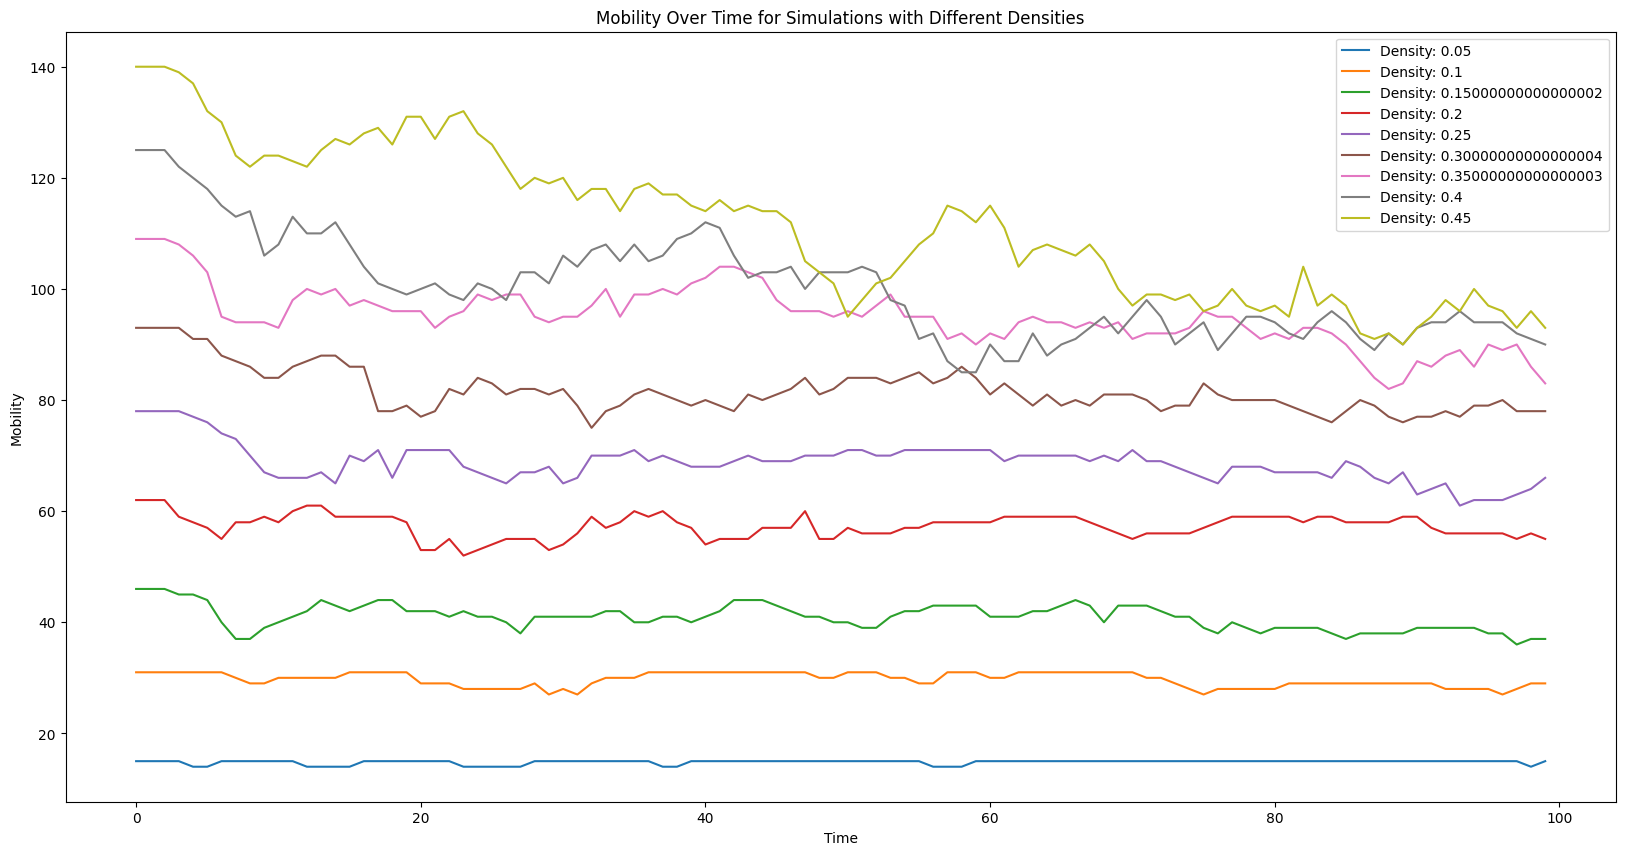

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the width and height as needed

for chain_len, density_data in results.items():
    if chain_len == 8:
        for density, sim_result in density_data.items():
            plt.plot(sim_result, label=f'Density: {density}')
        
plt.legend()
plt.xlabel('Time')
plt.ylabel('Mobility')
plt.title('Mobility Over Time for Simulations with Different Densities')
plt.show()


In [7]:
###CI SONO DEI BUG, NON SI PUO' RAGGIUNGERE IL RISULTATO

s_6 = Simulation(80, chain_len= 6)
s_7 = Simulation(70, chain_len= 7)
s_8 = Simulation(60, chain_len= 8)
s_9 = Simulation(50, chain_len= 9)
s_10 = Simulation(45, chain_len= 10)

list_of_sim = [s_6,s_7,s_8,s_9,s_10]

for sim in list_of_sim:
    sim.evolution(8000)

100%|██████████| 8000/8000 [00:22<00:00, 353.61it/s]


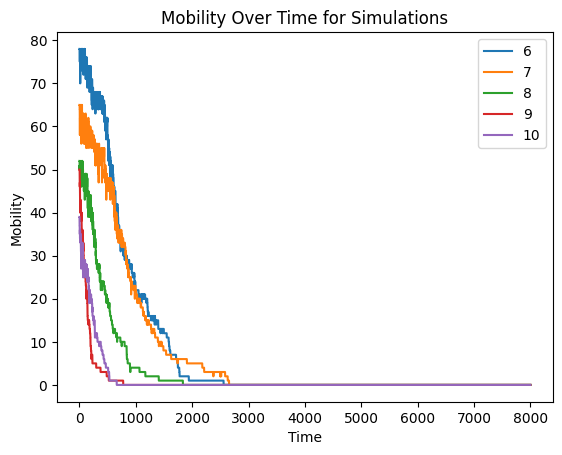

In [13]:
import matplotlib.pyplot as plt

# Assuming list_of_sim is a list of simulation objects
for sim in list_of_sim:
    plt.plot(sim.mobility, label = sim.chain_len)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Mobility')
plt.title('Mobility Over Time for Simulations')
plt.show()


319
319
0.4984375


  0%|          | 0/10 [00:00<?, ?it/s]

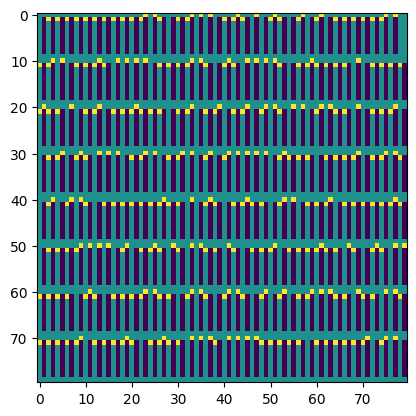

 20%|██        | 2/10 [00:00<00:01,  4.52it/s]

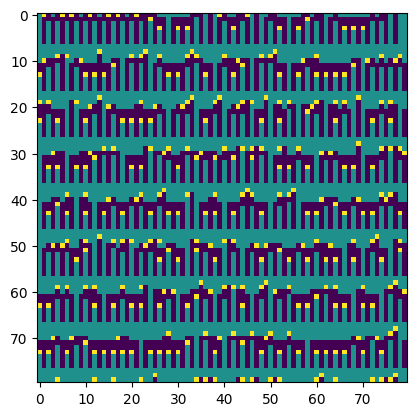

 40%|████      | 4/10 [00:00<00:01,  4.79it/s]

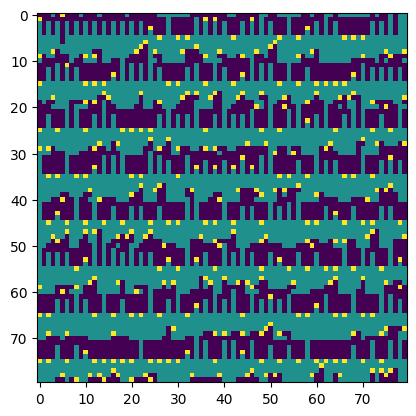

 60%|██████    | 6/10 [00:01<00:00,  4.97it/s]

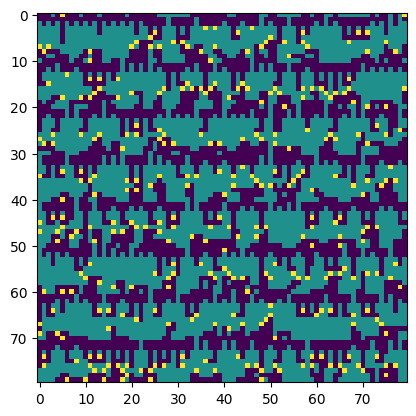

 80%|████████  | 8/10 [00:01<00:00,  5.09it/s]

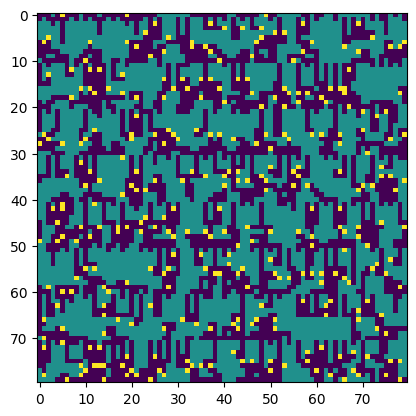

100%|██████████| 10/10 [00:02<00:00,  4.68it/s]


In [62]:
#codice vecchio, mi fido molto poco a buttarlo


class Simulation:
  def __init__(self,  b_size=100, n_chains = 320, chain_len=5):
      self.b_size = b_size
      self.board = np.zeros((b_size, b_size))
      self.chain_len = chain_len
      self.n_chains = n_chains
      self.positions = []
      self.mobility = []      
      
      idx = 0
      row = 0
      while idx < self.n_chains:
        for i in range(1,self.b_size, 2):
          if self.b_size - i <= 2:
             row += 1
          chains_positions = [[1+row*chain_len + k , i] for k in range(chain_len-1)]
          self.positions.append(chains_positions)
          idx += 1
          if idx >= self.n_chains:
             break
          

      """
      for row in range(0, num_rows * self.chain_len, self.chain_len):
            if (i %10 == 0)  or  (i > self.b_size - 3):
              chains_positions = [[row + k , i] for k in range(chain_len)]
              self.positions.append(chains_positions)
            else:
              chains_positions = [[row + k , i+1] for k in range(chain_len)]
              self.positions.append(chains_positions)
      """
      self.labeled_chains = {key: position for key, position in enumerate(self.positions, 1)}
      self.update_board()   
      self.density = len(self.positions) * chain_len / self.b_size**2

  def update_board(self):
    for key, positions in self.labeled_chains.items():
        for index, (x, y) in enumerate(positions):
            if index == 0:
                # Initialize to a different value if it's the first one in the chain
                self.board[x, y] = 1
            else:
                self.board[x, y] = -1

  def free_spot_finder(self, coordinate):
    free_spots = []
    x, y = coordinate
    for s in [1, -1]:
      if self.board[(x + s) % self.b_size, y] == 0:
          free_spots.append([(x + s) % self.b_size, y])
      if self.board[x, (y + s) % self.b_size] == 0:
          free_spots.append([x, (y + s) % self.b_size])
    return free_spots
  
  def mobility_measurer(self):
    count = 0
    for positions in self.labeled_chains.values():
       x,y = positions[0]
       if len(self.free_spot_finder([x,y])) > 0:
          count += 1
    return count
    
  def step(self):
    for key, positions in self.labeled_chains.items():
      free_spots = self.free_spot_finder(positions[0])
      if free_spots:
        mov = random.choice(free_spots)
        self.board[positions[-1]] = 0
        positions[1:] = positions[0:-1]
        positions[0] = mov
      self.update_board()
    self.mobility.append(self.mobility_measurer())

  def evolution(self, num_of_iterations, show_progress_bar=True):
      if show_progress_bar:
          progress_bar = tqdm(range(num_of_iterations))
      else:
          progress_bar = range(num_of_iterations)

      for i in progress_bar:
          self.step()
          if i%2 == 0:
            plt.imshow(self.board)
            plt.show()


s = Simulation(b_size=80, n_chains=319, chain_len=10)
print(len(s.positions))
print(s.n_chains)
print(s.density)
plt.imshow(s.board)
s.evolution(10)